## Introduction

In the last lesson we saw how to change the look and feel of our plots, both on the fly by altering the settings in the `rcParams` object, and permanently by adding them to our `matplotlibrc` file. There may come a time though, when you've created a style that you want to share with the rest of the world, or you may have multiple styles that you like to use for different reasons. When that time comes, you'll want to capture those settings in a style sheet. 

In this lesson, and the next, we'll see what matplotlib style sheets can do for us, and we'll begin by taking a look at the default styles that come with matplotlib.

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## What is a Style Sheet?

At the end of our last lesson, we saved a handful of default settings into our `matplotlibrc` file. Rather than doing that, we could have created a style sheet to hold these settings, and used it whenever we wanted a break from the norm. A style sheet is nothing more than a file with the extension `.mplstyle`, that resides in one a few default locations, and contains a handful of key/value pairs just like our `matplotlibrc` file. We'll see how to create a style sheet in the next lesson, but first, we're going to take a look at a few of the default style sheets that ship with matplotlib and see how to apply them.

Before we start though, we should take a snapshot of the current settings so we can reset them later, since style sheets basically alter the global settings in the `rcParams` object.

In [2]:
default_rcParams = dict(mpl.rcParams)

### Default Styles

Now, let's see what style sheets matplotlib has for us by default. The list of available styles are contained in the `pyplot.style.available` list, so we can see all of the styles available by simply printing each element in this list.

<!--- To see the list of available style sheets, you simply need to print the `pyplot.style.available` attribute. --->

In [3]:
for style in plt.style.available:
    print style

seaborn-darkgrid
seaborn-notebook
classic
seaborn-ticks
grayscale
bmh
seaborn-talk
dark_background
ggplot
fivethirtyeight
seaborn-colorblind
xkcd
seaborn-deep
seaborn-whitegrid
seaborn-bright
seaborn-poster
seaborn-muted
seaborn-paper
seaborn-white
seaborn-pastel
seaborn-dark
seaborn-dark-palette


To see one of these styles in action, you simply need to call the `pyplot.style.use` function and pass in the name of the style you want to use. Ultimately, this function will read the settings in the style into a dictionary object and call the `update` function on the `rcParams` object passing in the dictionary of style sheet settings. This has the effect of permanently altering the values in the `rcParams` object.

In the next cell, we'll use the `ggplot` style modelled after the [ggplot2][1] library written by [Hadley Wickham][2] for the [R statistical programming language][3]. I've used R a good deal in the past, and I personally love the ggplo2 library, both for the way it works and for its snazzy looks, so I tend to use this style a lot in my own work. But, personal recommendations aside, it's as good a place as any to start our exploration, so let's load it up and give it a try.

<!---, and so it will have side effects that will last throughout the entire session and this method of applying a style sheet is only recommended if you plan on using a single style for the entire session. If you plan on switching styles in a single session, you--->

[1]: http://ggplot2.org/
[2]: http://had.co.nz/
[3]: https://www.r-project.org/

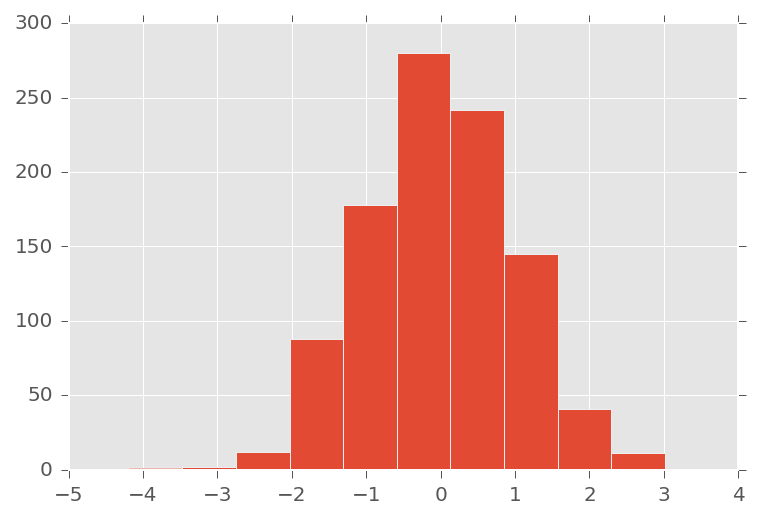

In [4]:
plt.style.use('ggplot')
plt.hist(np.random.randn(1000));

In [5]:
for k,v in mpl.rcParams.items():
    if k.startswith('figure'): print k, v

figure.subplot.right 0.9
figure.subplot.hspace 0.2
figure.dpi 80.0
figure.subplot.wspace 0.2
figure.subplot.bottom 0.125
figure.figsize [6.0, 4.0]
figure.autolayout False
figure.facecolor white
figure.max_open_warning 20
figure.edgecolor 0.50
figure.frameon True
figure.subplot.top 0.9
figure.titlesize medium
figure.titleweight normal
figure.subplot.left 0.125


Pretty nice, right? I know what you're thinking, "Finally, a good looking graph in matplotlib!"

We all know that matplotlib is powerful, but it's nice to see that with just one extra command, you can get good looking visualizations right out of the box as well. Speaking of which, let's take a look at one more.

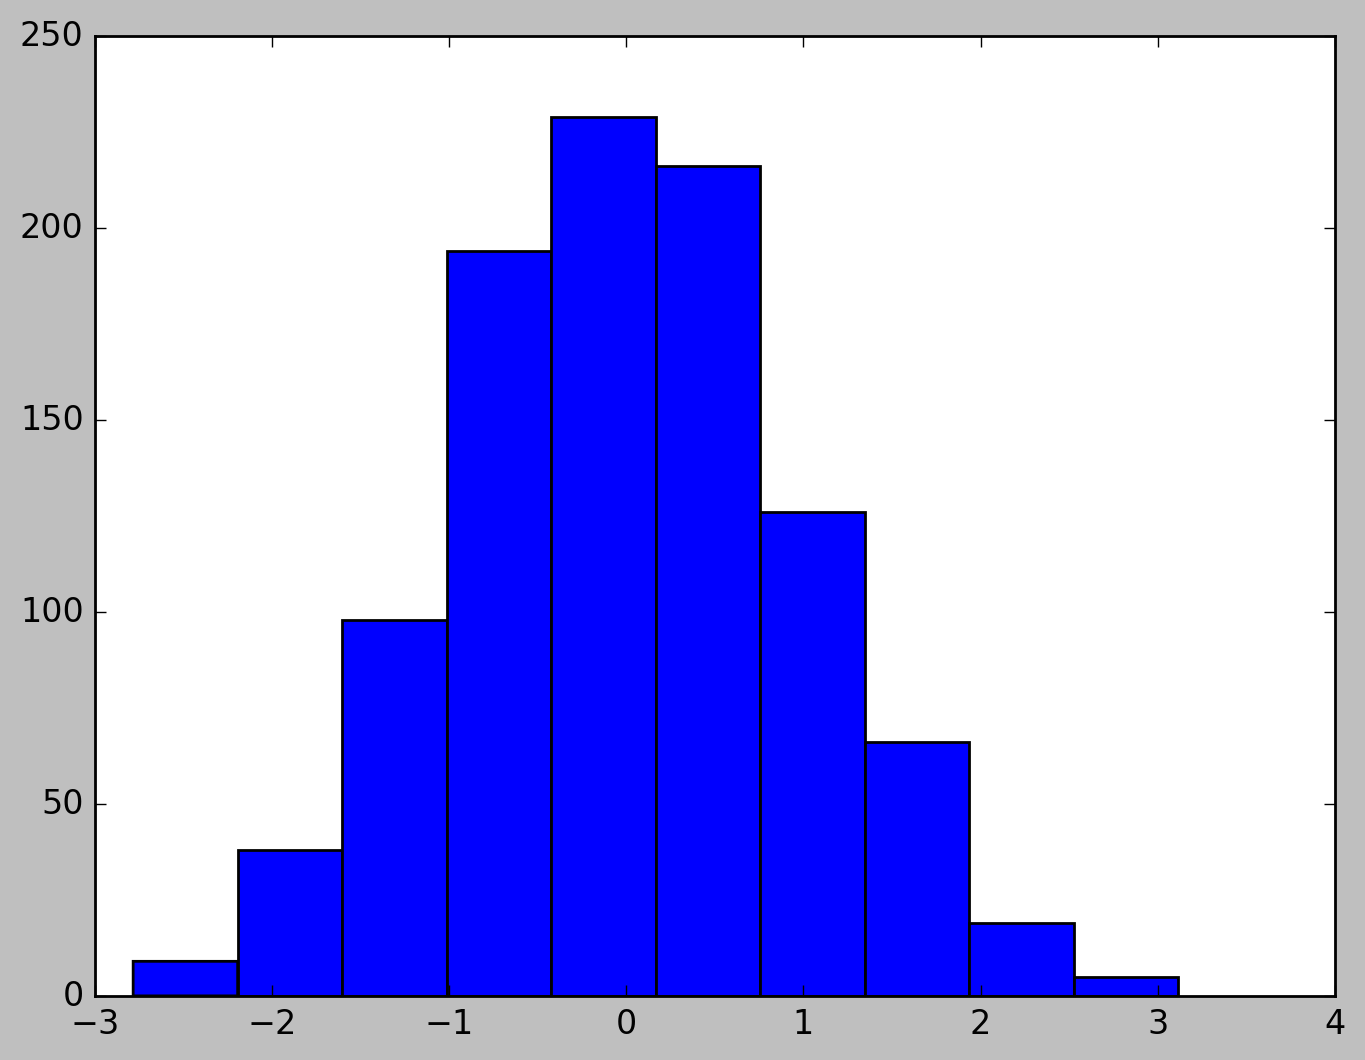

In [6]:
plt.style.use('classic')
plt.hist(np.random.randn(1000));

In [7]:
mpl.rcParams['figure.figsize']

[8.0, 6.0]

Ok, so maybe this one isn't all that good looking, but it does serve a purpose. If we were to try and use the `ggplot` style again, 

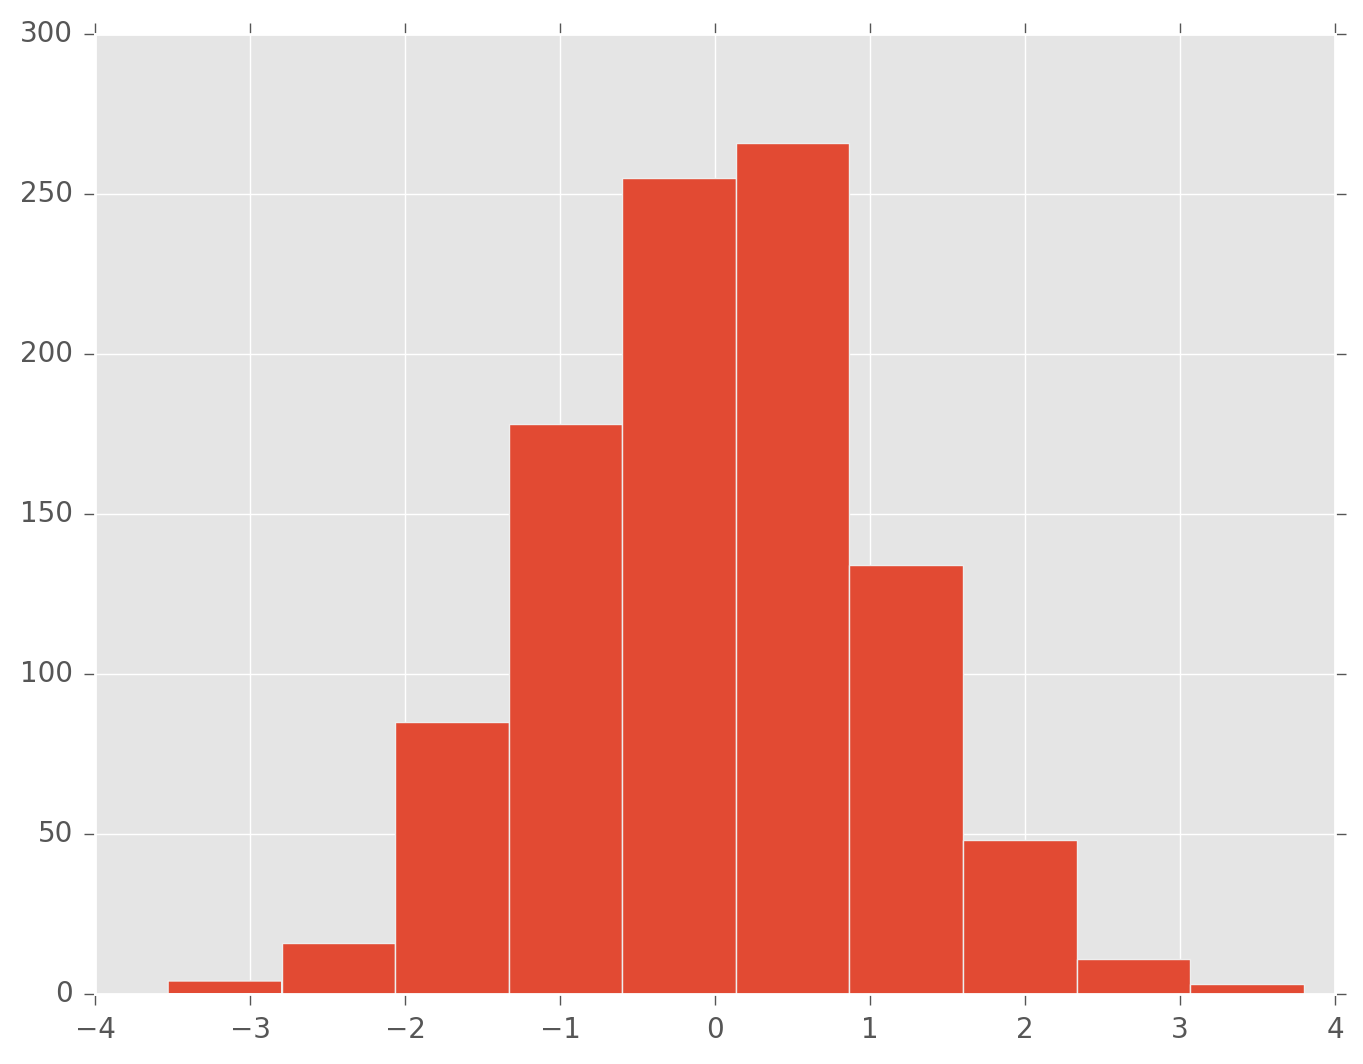

In [8]:
plt.style.use('ggplot')
plt.hist(np.random.randn(1000));

Notice this time that, though it looks pretty much the same as before, it's quite a bit bigger this time. In fact, it's the exact same size as the previous example, and there's a good reason for that. Remember, earlier I mentioned that the `pyplot.style.use` function ultimately just calls `update` on the `rcParams` dictionary object. The problem with this implementation is that the `update` function only updates the values for a given set of keys, so if a key isn't present in the dict passed into `update`, that key's value stays the same.

The `classic` style obviously sets the figure size to something larger than the default, and since the `ggplot` style doesn't touch the figure size, your new style essentially inherits the figure size from the previous one. 

Now, if you're only planning on using a single style throughout the entire notebook, script, interactive session, or whatever, you're probably fine just calling the `pyplot.style.use` function to set that style. However, if you plan on switching styles throughout, as we're doing here, you'll want to use the context manager that the `pyplot.style` module provides instead. To see an example of the `pyplot.style.context` in action, we'll first need to reset our `rcParams` object with the default settings we saved at the beginning of this lesson.

In [9]:
mpl.rcParams.update(default_rcParams)

Then, we can use the `pyplot.style.context` function to set the style we want temporarily and leave the global `rcParams` object alone. We'll give it a try in the next cell, and this time we'll try one of the other built-in styles. This time, we'll use the `fivethirtyeight` style, which is a style designed to mimic the look and feel of the graphs found on Nate Silver's data blog [FiveThirtyEight.com][1]---which, by the way, is an excellent read, if you're not familiar with it.

[1]: http://fivethirtyeight.com/

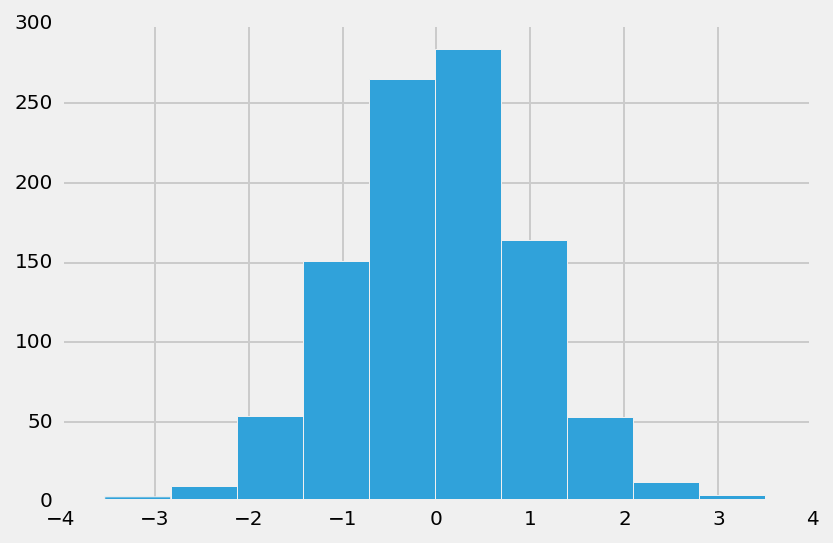

In [10]:
with plt.style.context('fivethirtyeight'):
    plt.hist(np.random.randn(1000));

And, now if we call the same plotting function again, this time outside of the context manager, we'll see that the default style has not been affected in anyway by our usage of the `fivethirtyeight` style above.

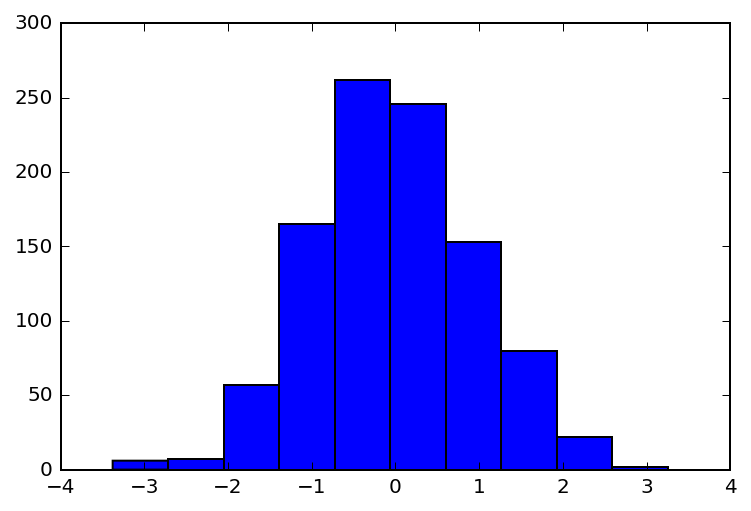

In [11]:
plt.hist(np.random.randn(1000));

One final note before moving on, both the `pyplot.style.use` and `pyplot.style.context` functions are overloaded to take different types of data. We've been passing in a single string representing the style we want to use, but we can also pass in a dict specifying just the attributes that we want to update. The example below, temporarily changes several of the characteristics of a line graph for a single plot. Let's run it and see how it looks.

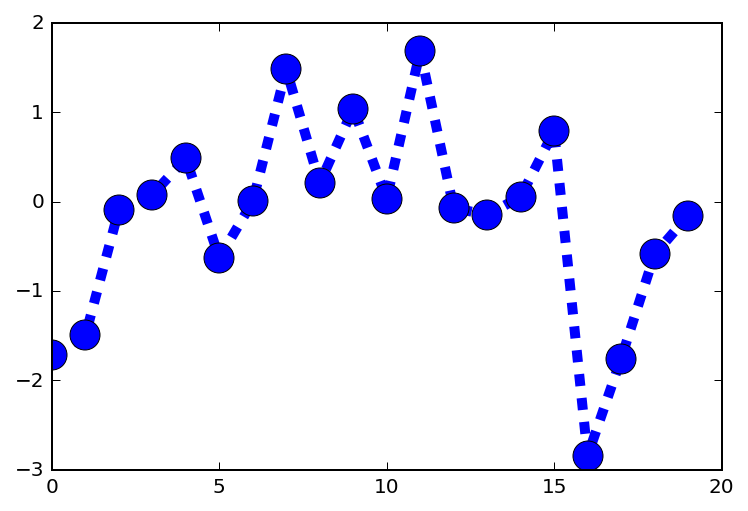

In [12]:
with plt.style.context({'lines.linewidth': 5, 
                        'lines.linestyle': '--', 
                        'lines.marker': 'o', 
                        'lines.markersize': 15}):
    plt.plot(np.random.randn(20))

And, since styles simply update the current settings rather than overwrite them completely, it's possible to use multiple styles together. Both the `pyplot.style.use` and the `pyplot.style.context` functions will accept a list of either strings specifying the styles to use, or dicts specifying the attributes to be changed. This will result in the `update` function being called for each element in the list in the order in which they appear. As an example, the code in the next cell, uses the `ggplot` style, and also passes in a dict that specifies a slightly taller figure size than the default.

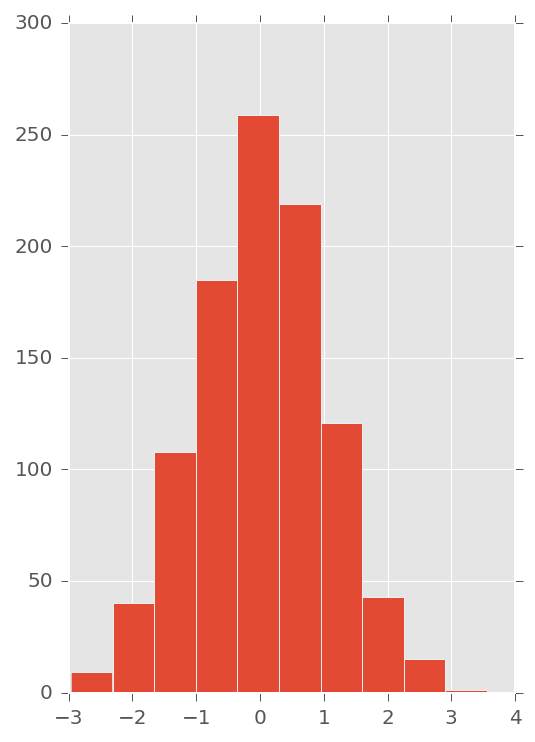

In [13]:
with plt.style.context(['ggplot', {'figure.figsize': [4.0, 6.0]}]):
    plt.hist(np.random.randn(1000));

And, that looks pretty much exactly the same as the plot we saw above, but of course, we're now seeing it in a much taller version that the typical ggplot style would allow.

## Conclusion

And, that will bring us to the very end of this lesson.

To recap, we learned the basics of how to apply style sheets, and we saw some of the default styles that matplotlib ships with in action. And, in the next lesson, we'll take this knowledge one step further, and close out our look at configuring matplotlib by learning how to create our very own styles.